This is an outdated version of the project that was scrapped.
Nothing in this file is considered part of the final project or analysis.

Sites Used

GPM data:
https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary

NDVI data:
https://glam1.gsfc.nasa.gov/

Crop data:
https://apps.fas.usda.gov/psdonline/app/index.html#/app/downloads

Loading .HDF5 file and converting to .csv:
https://towardsdatascience.com/working-with-hdf5-files-and-creating-csv-files-1a7d212d970f

In [ ]:
import h5py
import numpy as np
import pandas as pd

In [ ]:
# Read in data from local file
#df = pd.read_csv('./psd_alldata.csv')
df_cotton = pd.read_csv('./psd_cotton.csv')

#print(df.columns)
#print(df.columns[0:10])
#print(df[50:55])
df_cotton.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,2631000,Cotton,AF,Afghanistan,1960,2006,6,4,Area Harvested,4,(1000 HA),81.0
1,2631000,Cotton,AF,Afghanistan,1960,2006,6,20,Beginning Stocks,27,1000 480 lb. Bales,30.0
2,2631000,Cotton,AF,Afghanistan,1960,2006,6,125,Domestic Consumption,27,1000 480 lb. Bales,40.0
3,2631000,Cotton,AF,Afghanistan,1960,2006,6,176,Ending Stocks,27,1000 480 lb. Bales,40.0
4,2631000,Cotton,AF,Afghanistan,1960,2006,6,88,Exports,27,1000 480 lb. Bales,30.0


In [ ]:
# Read in GPM data
file = h5py.File('./GPM_DATA.HDF5', 'r')

grid = file['Grid']
grid.keys()

<KeysViewHDF5 ['nv', 'lonv', 'latv', 'time', 'lon', 'lat', 'time_bnds', 'lon_bnds', 'lat_bnds', 'precipitationCal', 'precipitationUncal', 'randomError', 'HQprecipitation', 'HQprecipSource', 'HQobservationTime', 'IRprecipitation', 'IRkalmanFilterWeight', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex']>

In [ ]:
# Read in NDVI data
df = pd.read_csv('./NDVI_DATA.csv', sep='delimiter')
#ndvi = df.to_numpy()

In [ ]:
# Retreive names of columns
cols = df.iloc[11].values[0]
ndvi_col_names = cols.split(',')
print(ndvi_col_names)

['ORDINAL DATE', 'START DATE', 'END DATE', 'SOURCE', 'SAMPLE VALUE', 'SAMPLE COUNT', 'MEAN VALUE', 'MEAN COUNT', 'ANOM VALUE', 'MIN VALUE', 'MAX VALUE']


In [ ]:
# Retreive data
data = df.iloc[12:,:]
for row in data.values:
  s = row[0][0].split(',')
  # print(s)

#data.columns = ndvi_col_names
#print(type(data["GLAM Project"]))
#print(data.iloc[0].values[0].split(','))
#for 

In [ ]:
# ndvi_data = np.copy(ndvi[12:])
# for i in range(ndvi_data.shape[0]):
#   ndvi_string = ndvi_data[i][0]
#   ndvi_string = np.char.split(ndvi_string, sep = ',')
#   print(ndvi_string)
#   print(type(ndvi_string))
#   for j in range(4, ndvi_data[i][0].shape[0]):
#     print(ndvi_data[i][j])
# #     ndvi_data[i][j] = float(ndvi_data[i][j])
#   break

# # print(ndvi_data[i])

['2002-185', '2002-07-04', '2002-07-11', 'STD', '0.553', '144209518', '0.573', '168359211', '-0.020', '0.550', '0.595']


TypeError: ignored

# Printing attributes

In [ ]:
print("Longitude data: {}".format(grid['lon']))
print("Longitude data attributes: {}".format(list(grid['lon'].attrs)))

## Output
# Longitude data: <HDF5 dataset "lon": shape (3600,), type "<f4">
# Longitude data attributes: ['DimensionNames', 'Units', 'units', 
# 'standard_name', 'LongName', 'bounds', 'axis', 'CLASS', 'REFERENCE_LIST']

print("Name: {}".format(grid['lon'].attrs['standard_name'].decode()))
print("Unit: {}".format(grid['lon'].attrs['units'].decode()))

## Output
# Name: longitude
# Unit: degrees_east

Longitude data: <HDF5 dataset "lon": shape (3600,), type "<f4">
Longitude data attributes: ['DimensionNames', 'Units', 'units', 'standard_name', 'LongName', 'bounds', 'axis', 'CLASS', 'REFERENCE_LIST']
Name: longitude
Unit: degrees_east


In [ ]:
print("Latitude data: {}".format(grid['lat']))
print("Latitude data attributes: {}".format(list(grid['lat'].attrs)))

## Output
# Latitude data: <HDF5 dataset "lat": shape (1800,), type "<f4">
# Latitude data attributes: ['DimensionNames', 'Units', 'units', 
# 'standard_name', 'LongName', 'bounds', 'axis', 'CLASS', 'REFERENCE_LIST']

print("Name: {}".format(grid['lat'].attrs['standard_name'].decode()))
print("Unit: {}".format(grid['lat'].attrs['units'].decode()))

## Output
# Name: latitude
# Unit: degrees_north

Latitude data: <HDF5 dataset "lat": shape (1800,), type "<f4">
Latitude data attributes: ['DimensionNames', 'Units', 'units', 'standard_name', 'LongName', 'bounds', 'axis', 'CLASS', 'REFERENCE_LIST']
Name: latitude
Unit: degrees_north


In [ ]:
print("Precipitation data: {}".format(grid['precipitationCal']))
print("Precipitation data attributes: {}".format(list(grid['precipitationCal'].attrs)))

## Output
# Precipitation data: <HDF5 dataset "precipitation": shape (1, 3600, 1800), type "<f4">
# Precipitation data attributes: ['DimensionNames', 'Units', 'units', 'coordinates', 
# '_FillValue', 'CodeMissingValue', 'DIMENSION_LIST']

print("Unit: {}".format(grid['precipitationCal'].attrs['units'].decode()))

## Output
# Unit: mm/hr

Precipitation data: <HDF5 dataset "precipitationCal": shape (1, 3600, 1800), type "<f4">
Precipitation data attributes: ['DimensionNames', 'Units', 'units', 'coordinates', '_FillValue', 'CodeMissingValue', 'DIMENSION_LIST']
Unit: mm/hr


# Loading in attributes to table

In [ ]:
longitude_values = np.repeat(list(grid['lon']), 1800)
latitude_values = list(grid['lat'])*3600
precipitation_values = np.array(list(grid['precipitationCal'])).flatten()

In [ ]:
dataset = pd.DataFrame({"lon": longitude_values, "lat": latitude_values, "precipitationCal": precipitation_values})
dataset.columns = [grid['lon'].attrs['standard_name'].decode() + " (" + grid['lon'].attrs['units'].decode() + ")",
                   grid['lat'].attrs['standard_name'].decode() + " (" + grid['lat'].attrs['units'].decode() + ")",
                   "Precipitation (" + grid['precipitationCal'].attrs['units'].decode() + ")",]
dataset.head()

,longitude (degrees_east),latitude (degrees_north),Precipitation (mm/hr)
0,-179.949997,-89.949997,-9999.900391
1,-179.949997,-89.849998,-9999.900391
2,-179.949997,-89.750000,-9999.900391
3,-179.949997,-89.650002,-9999.900391
4,-179.949997,-89.550003,-9999.900391


In [ ]:
dataset['Precipitation (mm/hr)'] = dataset['Precipitation (mm/hr)'].mask(
                                    dataset['Precipitation (mm/hr)'] < 0, 0)

In [ ]:
#dataset.shape
unique = np.sort(dataset['Precipitation (mm/hr)'].unique())
print(unique)
#print(max(dataset['Precipitation (mm/hr)']))

[0.000000e+00 6.536639e-12 5.091496e-11 ... 8.463714e+01 8.542840e+01
 8.755804e+01]


In [ ]:
dataset.head()

,longitude (degrees_east),latitude (degrees_north),Precipitation (mm/hr)
0,-179.949997,-89.949997,0.0
1,-179.949997,-89.849998,0.0
2,-179.949997,-89.750000,0.0
3,-179.949997,-89.650002,0.0
4,-179.949997,-89.550003,0.0


In [ ]:
#dataset.to_csv("./precipitation_test.csv", index = False)

# Test out data

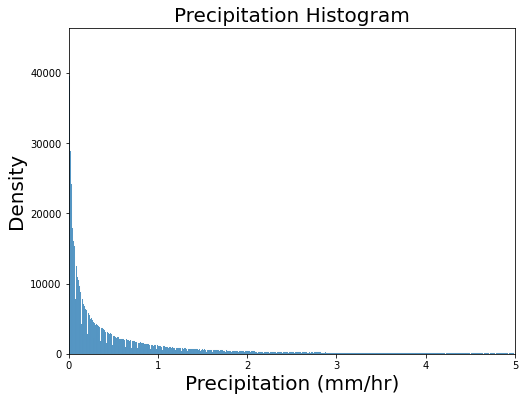

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X = dataset.drop(columns=['Precipitation (mm/hr)'])
y = dataset['Precipitation (mm/hr)']
y_nozeros = y[y != 0]

plt.figure(figsize=(8,6))
s = sns.histplot(y_nozeros, bins = 10000)
s.set_xlabel("Precipitation (mm/hr)", fontsize = 20)
s.set_ylabel("Density", fontsize = 20)
plt.xlim(0, 5) # Limiting to small values for now, since this is where nearly all the entries lie
title = plt.title("Precipitation Histogram", fontsize = 20)

In [ ]:
print(X.isnull().sum())

longitude (degrees_east)    0
latitude (degrees_north)    0
dtype: int64


Feature importances:  [0.49913808 0.50086192]
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Important Features')

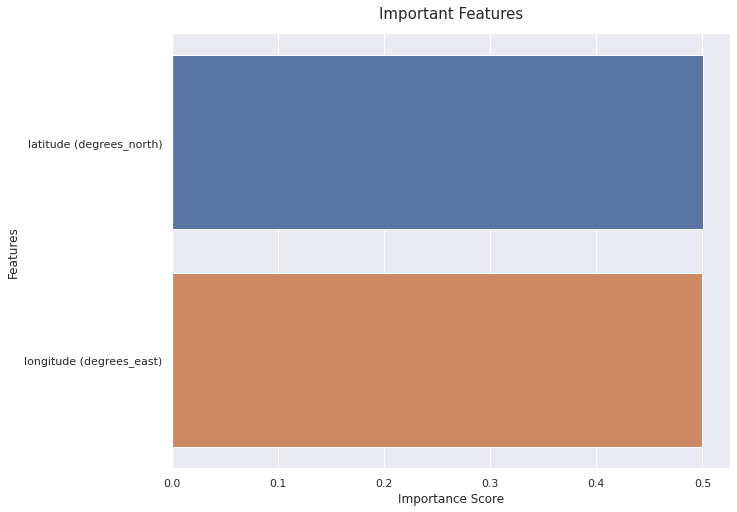

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Perform predictions using a Random Forst Classifier
rf = RandomForestRegressor()
rf.fit(X, y)

# Create a pandas Series storing the feature importances of each column in regards to predicting SalePrice
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot out the features from most important to least
print('Feature importances: ', rf.feature_importances_)
sns.set(rc={"figure.figsize":(10, 8)})
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Important Features", fontsize=15, pad=15)

In [ ]:
# Standardize the independent features
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Split the features into train and test groups, with 20% of the data being used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Import mean squared error function for purpose of calculating results
from sklearn.metrics import mean_squared_error

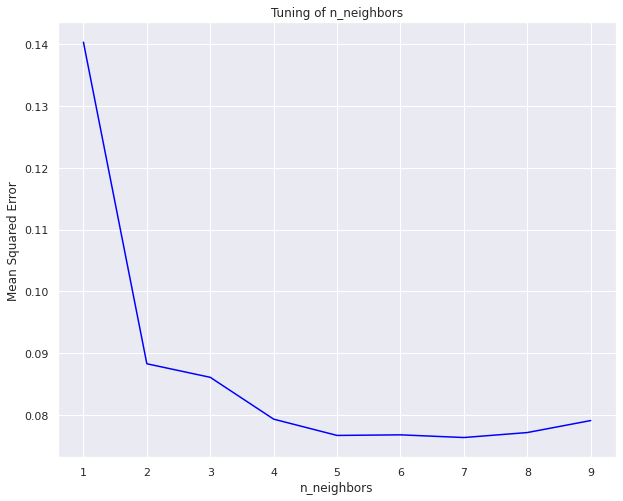

In [ ]:
# Calculating the MSE of KNN for n_neighbors 1 to 10
from sklearn.neighbors import KNeighborsRegressor
knn_mse_errors = []
for i in range(1,10):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  knn_mse_errors.append(mean_squared_error(y_test, y_pred_knn))

# Plot the results of all iterations
x = np.arange(1, 10)
y = np.array(knn_mse_errors)

plt.title("Tuning of n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Mean Squared Error")
plt.plot(x, y, color ="blue")
plt.show()

In [ ]:
# Perform a KNN regressor with the best n_neighbors value from the graph
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# Print the mse and score of the model
print(mean_squared_error(y_test, y_pred_knn))
print(knn.score(X_test,y_test))

0.07637353
0.8792046687176295


In [ ]:
# Scrapped function to remove points that are within a set number of degrees
# 0.1 degrees = ~6.91 miles

# import numpy as np
# threshold = 0.5

# gpm_mat = gpm_data.to_numpy()
# i = 0
# while i < gpm_mat.shape[0]-1:
#   p1 = gpm_mat[i, 0:2]
#   p2 = gpm_mat[i+1, 0:2]
#   dist = np.linalg.norm(p1 - p2)
#   if dist <= threshold:
#     gpm_mat = np.delete(gpm_mat, i+1, 0)
#   else:
#     i += 1

# gpm_data = pd.DataFrame(gpm_mat, columns = gpm_data.columns.values)